# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from ratelimit import limits
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(city_count)

623


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building API Calls

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"

# Building a Dictionary to store data
city_weather = {"City": [],
             "Lat": [],
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [],
             "Date": []
               }

# Getting Weather Data
response = requests.get(query_url).json()

# print(response)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 10.5669,
        "lon": 72.642
    },
    "dt": 1659487571,
    "id": 1267390,
    "main": {
        "feels_like": 26.66,
        "grnd_level": 1005,
        "humidity": 80,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 26.66,
        "temp_max": 26.66,
        "temp_min": 26.66
    },
    "name": "Kavaratti",
    "rain": {
        "1h": 0.13
    },
    "sys": {
        "country": "IN",
        "sunrise": 1659488310,
        "sunset": 1659533562
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 298,
        "gust": 13.2,
        "speed": 10.72
    }
}


In [4]:
# Variables
record_num = 1
city_count = len(cities)
print("----------------------------- Beginning Data Retrieval  -----------------------------")
MINUTE = 60
@limits(calls=60, period=MINUTE)

def data_retrieval():
    global record_num
    # Looping through city list and then appendinig results into dictionary
    for city in cities:
        query_url = f"{base_url}appid={weather_api_key}&units=Imperial&q={city}"
        response = requests.get(query_url).json()
        
        try:
            print(f'Processing Weather Data for Record {record_num} of {city_count}: {response["name"]}')
        
            city_weather["City"].append(response["name"])
            city_weather["Lat"].append(response["coord"]["lat"])
            city_weather["Lng"].append(response["coord"]["lon"])
            city_weather["Max Temp"].append(response["main"]["temp_max"])
            city_weather["Humidity"].append(response["main"]["humidity"])
            city_weather["Cloudiness"].append(response["clouds"]["all"])
            city_weather["Wind Speed"].append(response["wind"]["speed"])
            city_weather["Country"].append(response["sys"]["country"])
            city_weather["Date"].append(response["dt"])
            record_num +=1
            
        except(KeyError, IndexError):
            print(f"{city} not found, on to the next one!")
        pass

data_retrieval()
print("----------------------------- Data Retrieval Complete -----------------------------")

----------------------------- Beginning Data Retrieval  -----------------------------
Processing Weather Data for Record 1 of 623: Saint George
Processing Weather Data for Record 2 of 623: Hofn
Processing Weather Data for Record 3 of 623: Shimanovsk
Processing Weather Data for Record 4 of 623: Dolinsk
Processing Weather Data for Record 5 of 623: Sept-Îles
Processing Weather Data for Record 6 of 623: Kampene
Processing Weather Data for Record 7 of 623: Hong Kong
Processing Weather Data for Record 8 of 623: Rikitea
Processing Weather Data for Record 9 of 623: Tasiilaq
Processing Weather Data for Record 10 of 623: San Patricio
Processing Weather Data for Record 11 of 623: Mount Gambier
Processing Weather Data for Record 12 of 623: Mosquera
Processing Weather Data for Record 13 of 623: Atuona
Processing Weather Data for Record 14 of 623: Avera
taolanaro not found, on to the next one!
Processing Weather Data for Record 15 of 623: Sur
grand river south east not found, on to the next one!
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a DataFrame
city_data_df = pd.DataFrame(city_weather)
# Exporting to CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,97.39,29,0,20.71,US,1659487398
1,Hofn,64.2539,-15.2082,48.69,73,49,11.41,IS,1659487664
2,Shimanovsk,52.0000,127.7000,76.48,59,0,5.99,RU,1659487665
3,Dolinsk,47.3500,142.8000,67.32,72,17,8.37,RU,1659487665
4,Sept-Îles,50.2001,-66.3821,68.00,91,75,5.75,CA,1659487657
...,...,...,...,...,...,...,...,...,...
566,Tāybād,34.7400,60.7756,75.69,33,0,11.77,IR,1659487816
567,Bodden Town,19.2833,-81.2500,86.00,78,20,11.50,KY,1659487817
568,Viranşehir,37.2353,39.7631,85.06,33,0,7.92,TR,1659487817
569,Poli,-3.3333,36.8000,52.41,89,27,2.01,TZ,1659487817


In [6]:
# Creating a Summary Stats Table
lat = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
date = city_data_df["Date"]

data_table = pd.DataFrame({"Lat":lat,
                          "Lng":lng,
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness":cloudiness,
                          "Wind Speed":wind_speed,
                          "Date":date})
data_table.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,37.1041,-113.5841,97.39,29,0,20.71,1659487398
1,64.2539,-15.2082,48.69,73,49,11.41,1659487664
2,52.0000,127.7000,76.48,59,0,5.99,1659487665
3,47.3500,142.8000,67.32,72,17,8.37,1659487665
4,50.2001,-66.3821,68.00,91,75,5.75,1659487657


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
print(data_table.loc[data_table['Humidity'] > 100])

Empty DataFrame
Columns: [Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Date]
Index: []


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.dropna(inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,97.39,29,0,20.71,US,1659487398
1,Hofn,64.2539,-15.2082,48.69,73,49,11.41,IS,1659487664
2,Shimanovsk,52.0000,127.7000,76.48,59,0,5.99,RU,1659487665
3,Dolinsk,47.3500,142.8000,67.32,72,17,8.37,RU,1659487665
4,Sept-Îles,50.2001,-66.3821,68.00,91,75,5.75,CA,1659487657


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

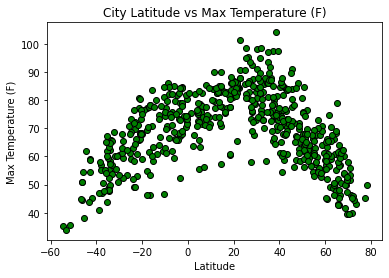

In [9]:
plt.scatter(city_weather["Lat"],city_weather["Max Temp"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/City Latitude vs Max Temperature.png")

This scatterplot shows the relationship of latitude to max temperature for all chosen cities in the northern and southern hemisphere's. We can see here that there is a strong, non-linear relationship between latitude and max temperature. 

## Latitude vs. Humidity Plot

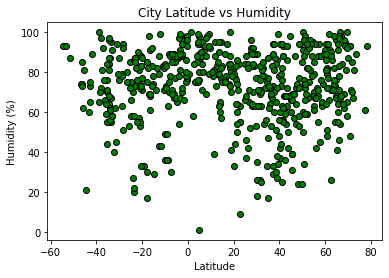

In [10]:
plt.scatter(city_weather["Lat"],city_weather["Humidity"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/City Latitude vs Humidity.png")

This scatterplot shows the correlation between latitude and humidity for all chosen cities in the northern and southern hemisphere. There is an even distribution of plot points which suggets that there is no relationship between latitude and humidity percentages, but it is clustered above 50% humidity.

## Latitude vs. Cloudiness Plot

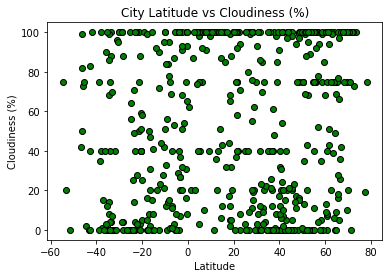

In [11]:
plt.scatter(city_weather["Lat"],city_weather["Cloudiness"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/City Latitude vs Cloudiness.png")

This scatterplot shows the correlation between latitude and cloudiness for all chosen cities in the northern and southern hemisphere. There appears to be no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

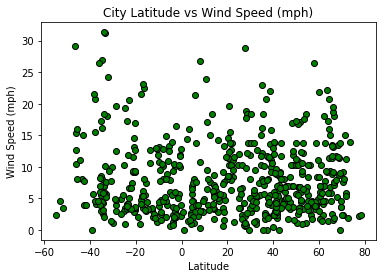

In [12]:
plt.scatter(city_weather["Lat"],city_weather["Wind Speed"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/City Latitude vs Wind Speed.png")

This scatterplot shows the relationship for latitude and wind speed for all chosen cities in the northern and southern hemisphere. There appears to be no relationship shown, with most of the values being below 15 mph. 

## Linear Regression

In [13]:
# First Separate Northern Hemisphere from Southern Hemisphere

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [14]:
# Creating a function for Linear Regression
def linregress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between max temperature and latitude in the northern hemisphere is -0.66


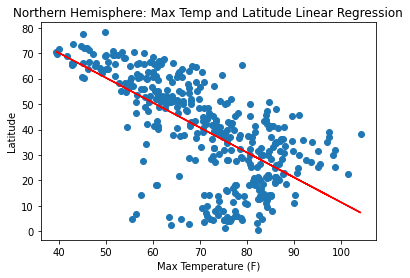

In [15]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"])
print(f"The correlation between max temperature and latitude in the northern hemisphere is {round(correlation[0],2)}")


# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between max temperature and latitude in the southern hemisphere is 0.73


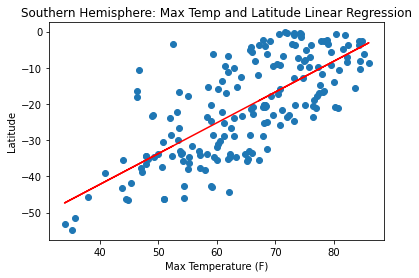

In [16]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"])
print(f"The correlation between max temperature and latitude in the southern hemisphere is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression")



This pair of scatterplots goes deeper into evaluating the relationship between max temperature and latitude by separating the values between the northern and southern hemispheres. Upon first glance we can see that both hemisphere's are opposite from eachother, with there being a strong negative correlation between max temperature and latitude in the northern hemisphere but a strong positive relationship in the southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is 0.09


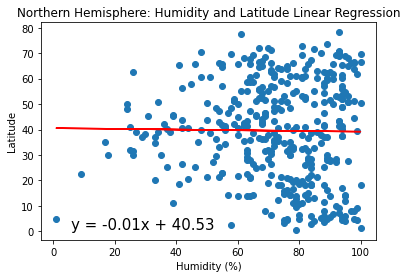

In [17]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Humidity"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])
print(f"The correlation between humidity and latitude is {round(correlation[0],2)}")


# Formatting
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Humidity vs Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is 0.09


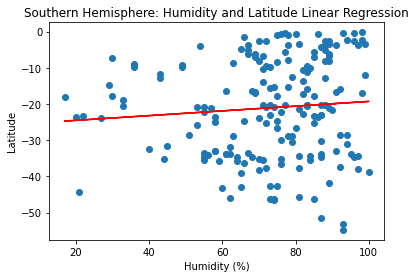

In [18]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])
print(f"The correlation between humidity and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Humidity vs Latitude Linear Regression")

This pair of scatterplots goes deeper into evaluating the relationship between max temperature and latitude by separating the values between the northern and southern hemispheres. We can see that both plots show the same relationship and correlation, suggesting that there is no relationship between humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness and latitude is -0.01


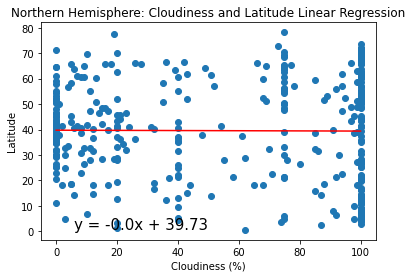

In [19]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"])
print(f"The correlation between cloudiness and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Cloudiness vs Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness and latitude is 0.09


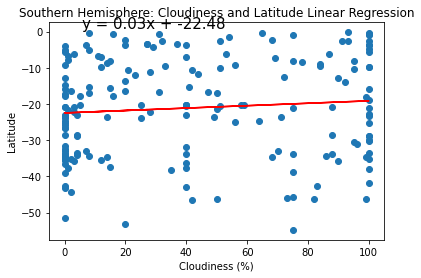

In [20]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"])
print(f"The correlation between cloudiness and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Cloudiness vs Latitude Linear Regression")


This pair of scatterplots goes deeper into evaluating the relationship between cloudiness and latitude by separating the values between the northern and southern hemispheres. There appears to be no coorrelation between cloudiness and latiitude in both hemispheres. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is 0.07


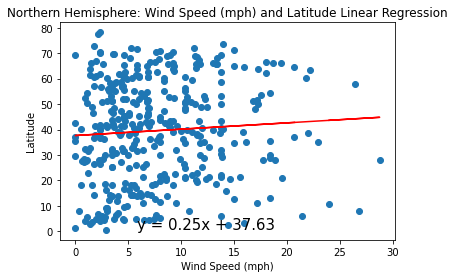

In [21]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"])
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.2


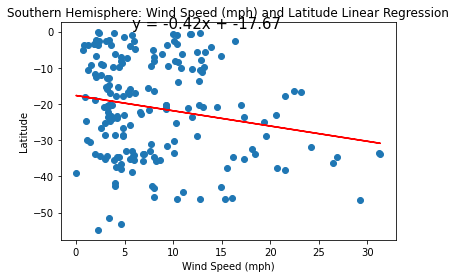

In [22]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"])


# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"])
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")

This pair of scatterplots goes deeper into evaluating the relationship between wind speed and latitude by separating the values between the northern and southern hemispheres. There appears to be a negative correlation in both hemispheres between wind speed and latitude. 